In [67]:
%matplotlib inline

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sets import Set

# Importation des fichiers

#### GRN_edges_S_cerevisiae.txt

In [69]:
edges=pd.read_csv("GRN_edges_S_cerevisiae.txt",header=0)
edges=edges.drop(columns=["Unnamed: 0"])
edges.head()

,transcription_factor,target_gene
0,G15,G1
1,G98,G1
2,G109,G1
3,G22,G9
4,G211,G11


#### net4 transcription factors.tsv

In [70]:
factors=pd.read_csv("net4_transcription_factors.tsv",header=0)
factors.head()

,transcription_factor
0,G1
1,G2
2,G3
3,G4
4,G5


#### net4 gene ids.tsv

In [71]:
geneIDS=pd.read_csv("net4_gene_ids.tsv",sep="\t",header=0)
geneIDS.head()

,ID,Name
0,G1,YHR084W
1,G2,YER109C
2,G3,YDR496C
3,G4,YBR098W
4,G5,YNL139C


####  go slim mapping.tab.txt

In [72]:
mapping=pd.read_csv("go_slim_mapping.tab.txt",sep="\t",header=0)
mapping.head()

,HRA1,HRA1.1,S000119380,C,cellular_component,GO:0005575,ncRNA_gene
0,HRA1,HRA1,S000119380,F,molecular_function,GO:0003674,ncRNA_gene
1,HRA1,HRA1,S000119380,P,rRNA processing,GO:0006364,ncRNA_gene
2,HRA1,HRA1,S000119380,P,ribosomal small subunit biogenesis,GO:0042274,ncRNA_gene
3,ICR1,ICR1,S000132612,C,nucleus,GO:0005634,ncRNA_gene
4,ICR1,ICR1,S000132612,F,molecular_function,GO:0003674,ncRNA_gene


# Représentations du graphe

## Graphe complet

In [186]:
GC=nx.from_pandas_dataframe(edges,'transcription_factor','target_gene',create_using=nx.DiGraph())

In [187]:
GC.add_nodes_from(geneIDS["ID"])
GC.add_nodes_from(factors['transcription_factor'])
print(nx.info(GC))

Name: 
Type: DiGraph
Number of nodes: 5950
Number of edges: 3940
Average in degree:   0.6622
Average out degree:   0.6622


In [51]:
nodecolor=list()
nodesize=list()
for node in list(GC.nodes) :
    if node in list(factors['transcription_factor']) :
        nodecolor.append('deeppink')
        nodesize.append(3000)
    else :
        nodecolor.append('cornflowerblue')
        nodesize.append(1500)

In [ ]:
plt.figure(figsize=(150,150))
nx.draw_networkx(GC, node_size=nodesize, with_labels=False, node_color=nodecolor,
                 arrowstyle='Fancy, head_length=.1,head_width=.4, tail_width=0.1')
plt.savefig("GC.png")

## Graphe de la région régulatoire (centre connecté)

#### Répartition des facteurs de transcription

In [188]:
G=nx.from_pandas_dataframe(edges,'transcription_factor','target_gene',create_using=nx.DiGraph())
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 1994
Number of edges: 3940
Average in degree:   1.9759
Average out degree:   1.9759


In [74]:
nodecolor=list()
nodesize=list()
for node in list(G.nodes) :
    if node in list(edges['transcription_factor']) :
        nodecolor.append('deeppink')
        nodesize.append(3000)
    else :
        nodecolor.append('cornflowerblue')
        nodesize.append(1500)

In [ ]:
plt.figure(figsize=(150,150))
nx.draw_networkx(G, node_size=nodesize, with_labels=False, node_color=nodecolor,
                 arrowstyle='Fancy, head_length=.1,head_width=.4, tail_width=0.1')
plt.savefig("G.png")

In [ ]:
plt.figure(figsize=(200,200))
pos=nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos=pos, node_size=nodesize, with_labels=False, node_color=nodecolor,
                 arrowstyle='Fancy, head_length=.1,head_width=.4, tail_width=0.1')
plt.savefig("G_layout.png")

#### Matrice d'adjacence

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]), <a list of 10 Text yticklabel objects>)

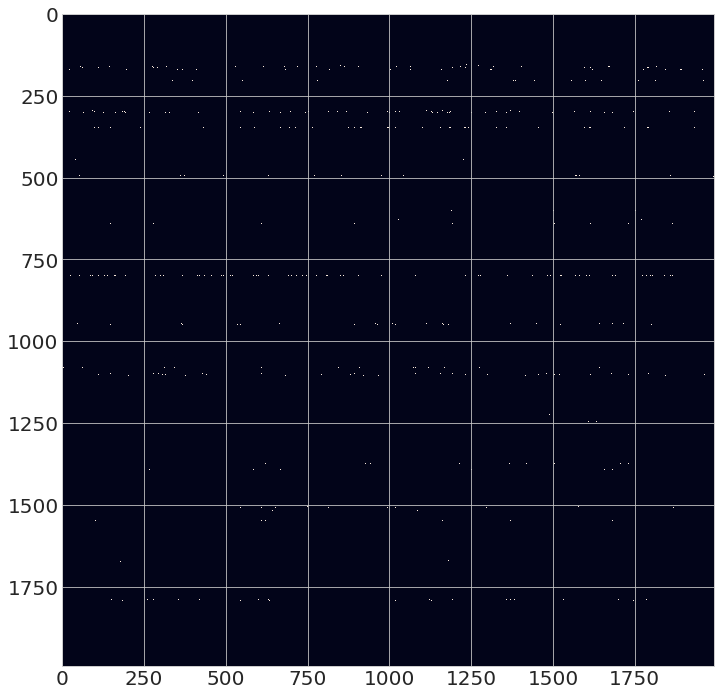

In [116]:
adjacence=nx.to_numpy_matrix(G)
sns.set_style("whitegrid")
plt.figure(figsize=(20,12))
plt.imshow(adjacence)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Description du graphe

Certaines des mesures suivantes ne sont pas disponibles pour les graphes dirigés : nous utiliserons alors la version non dirigée de notre graphe.

In [195]:
GU=nx.to_undirected(G)

#### Diamètre et distance moyenne

In [219]:
# print(nx.diameter(G)) ==> Found infinite path length because the digraph is not strongly connected

#### Degrés des noeuds et Connectivité moyenne

In [220]:
Deg=nx.degree(G)
degrees=[]
nodes=[]
for d in Deg:
    degrees.append(d[1])
    nodes.append(d[0])

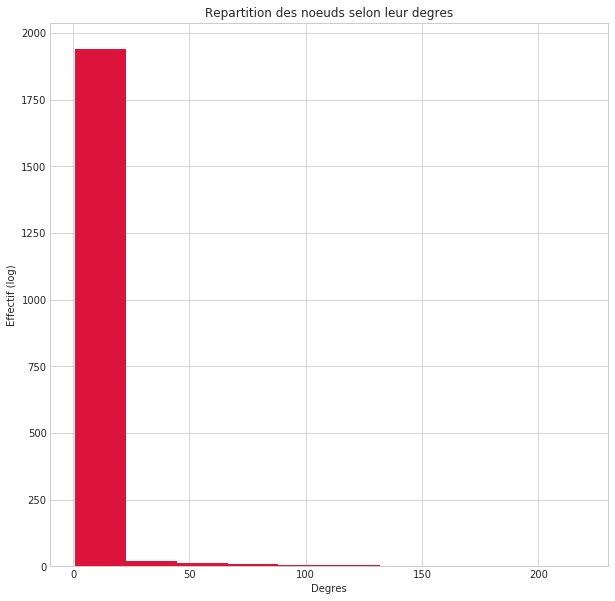

In [228]:
plt.figure(figsize=(10,10))
plt.hist(degrees,color="Crimson")
plt.xlabel('Degres')
plt.ylabel('Effectif (log)')
plt.title('Repartition des noeuds selon leur degres')

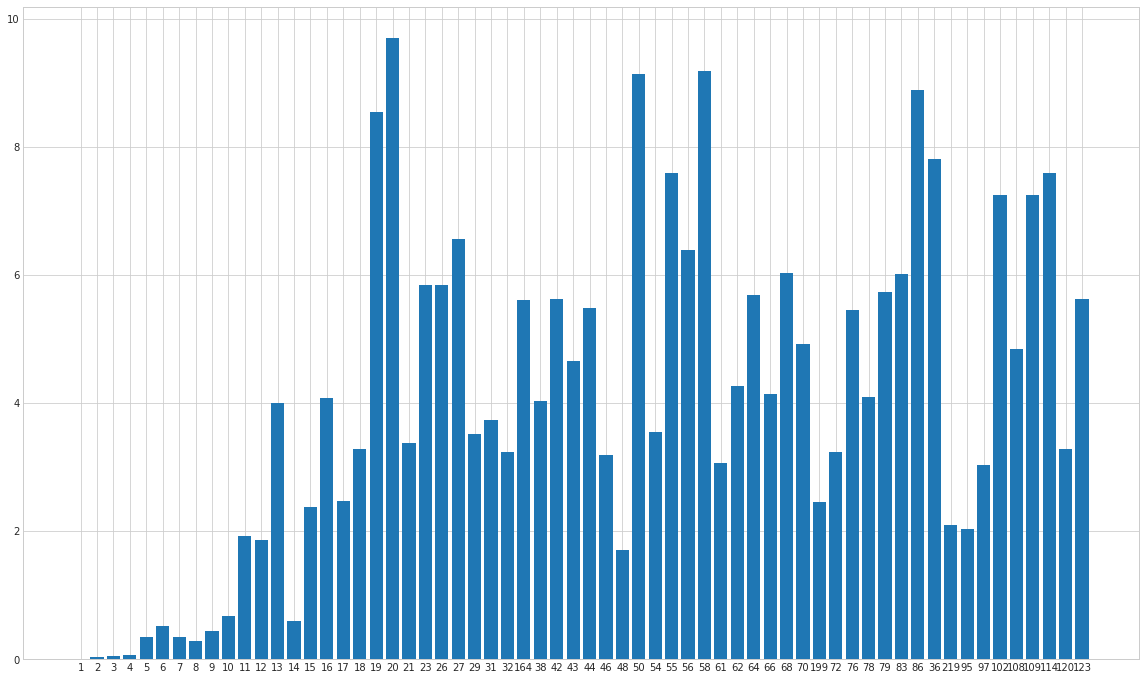

In [218]:
Connect=nx.average_degree_connectivity(G)
plt.figure(figsize=(20,12))
plt.bar(range(len(Connect)), list(Connect.values()), align='center')
plt.xticks(range(len(Connect)), list(Connect.keys()))
plt.show()

#### Rich club coeficients

In [ ]:
# courbe avec threshold, eventuellement représenter le rich club ? (sous graphe)

#### Densité

In [201]:
print("Densité moyenne du graphe : %f" % nx.density(G))

Densité moyenne du graphe : 0.000991


#### Betweeness centrality

In [ ]:
# boxplot

#### Coeficients de clustering (Local et Global)

In [196]:
print("Coeficient de clustering global : %f" % nx.average_clustering(GU))

Coeficient de clustering global : 0.071150


# Algorithme de décomposition K-shell

# Complexité temporelle